<a href="https://www.kaggle.com/code/devarshigupta/car-price-regression-model-tensorflow?scriptVersionId=161050572" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import required libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Preprocessing and Visualization of data

In [2]:
# Read data into pandas dataframe
df = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
pd.set_option('display.max_columns', None)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
# Check for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
# Drop duplicates if any
df.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


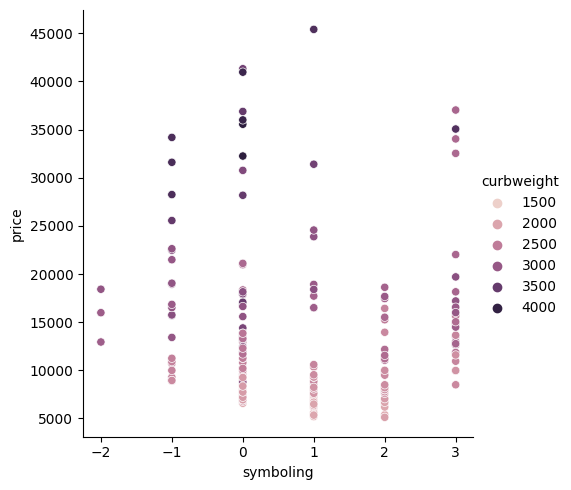

In [5]:
sns.relplot(x="symboling", y="price", hue="curbweight", data=df) # Checking relevance of symboling in regards to price

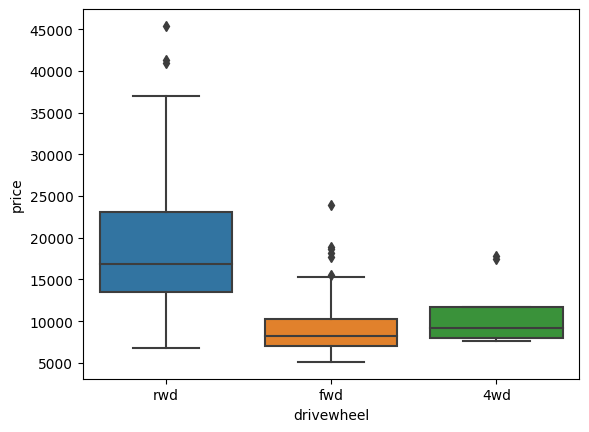

In [6]:
sns.boxplot(x=df["drivewheel"], y=df["price"]); #Checking effect of drivewheel on price

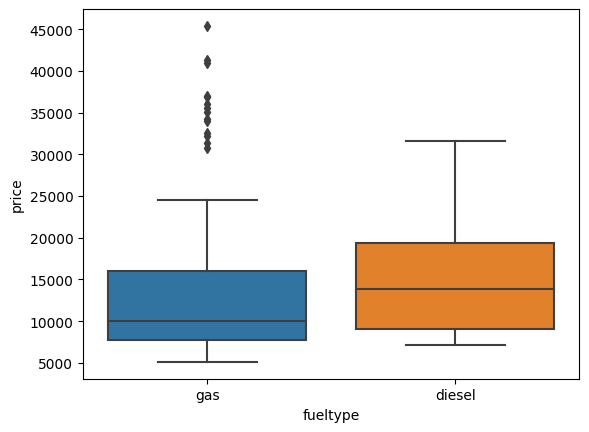

In [7]:
sns.boxplot(x=df["fueltype"], y=df["price"]); #Checking effect of fuelprice on price

In [8]:
# Drop unnecessary columns
df.drop(["CarName", "symboling", "car_ID"], axis=1, inplace=True)
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
# Create features and labels from dataframe
X = df.drop(["price"], axis=1)
y = df["price"]
X, y

(    fueltype aspiration doornumber      carbody drivewheel enginelocation  \
 0        gas        std        two  convertible        rwd          front   
 1        gas        std        two  convertible        rwd          front   
 2        gas        std        two    hatchback        rwd          front   
 3        gas        std       four        sedan        fwd          front   
 4        gas        std       four        sedan        4wd          front   
 ..       ...        ...        ...          ...        ...            ...   
 200      gas        std       four        sedan        rwd          front   
 201      gas      turbo       four        sedan        rwd          front   
 202      gas        std       four        sedan        rwd          front   
 203   diesel      turbo       four        sedan        rwd          front   
 204      gas      turbo       four        sedan        rwd          front   
 
      wheelbase  carlength  carwidth  carheight  curbweight en

In [10]:
# Import required functions from sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [11]:
# Separate categorical and numeric values
df_num = X.select_dtypes(include=["int","float"]).columns
df_cat = X.select_dtypes(include=["object"]).columns
df_num, df_cat

(Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg'],
       dtype='object'),
 Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
        'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
       dtype='object'))

In [12]:
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), df_num),
    (OneHotEncoder(handle_unknown="ignore"), df_cat)
)

In [13]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 22), (41, 22), (164,), (41,))

In [14]:
# Fit column transformer
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])

In [15]:
# Transform training and test data using column transformer
X_train_transform = ct.transform(X_train)
X_test_transform = ct.transform(X_test)

In [16]:
# Check shape of training and test data
X_train_transform.shape, y_train.shape, X_test_transform.shape, y_test.shape

((164, 50), (164,), (41, 50), (41,))

## Build Simple model

In [17]:
# Build model using tensorflow
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_test_transform.shape[1]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [18]:
# Compile model
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

In [19]:
# Fit model
history1 = model1.fit(X_train_transform, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 2s 6ms/step - loss: 13223.3369 - mae: 13223.3369
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 13222.9189 - mae: 13222.9189
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 13222.4814 - mae: 13222.4814
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 13221.9980 - mae: 13221.9980
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 13221.4512 - mae: 13221.4512
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 13220.8340 - mae: 13220.8340
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 13220.1436 - mae: 13220.1436
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 13219.3730 - mae: 13219.3730
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 13218.5186 - mae: 13218.5186
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 13217.5791 - mae: 13217.5791

In [20]:
# Evaluate model
model1.evaluate(X_test_transform, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 13008.3486 - mae: 13008.3486


[13008.3486328125, 13008.3486328125]

## Make prediction on simple model

In [21]:
# Function to make prediction
def make_pred(model, X_test, y_test):
    y_pred = model.predict(X_test)
    # Reshape and change datatype
    y_pred = tf.cast(tf.squeeze(y_pred), dtype=tf.double)
    y_test = y_test
    return y_pred

In [22]:
# Call function to make predcition
y_pred = make_pred(model1, X_test_transform, y_test)
y_pred

2/2 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(41,), dtype=float64, numpy=
array([531.98529053, 468.78585815, 489.34786987, 503.87277222,
       556.47845459, 462.92907715, 497.04467773, 453.08920288,
       465.48886108, 505.80477905, 486.59802246, 451.28707886,
       499.88223267, 488.15905762, 568.47058105, 451.71563721,
       394.11312866, 471.6678772 , 473.9175415 , 467.92727661,
       492.17416382, 498.60137939, 449.9125061 , 449.97994995,
       449.02322388, 532.46008301, 480.44244385, 533.34344482,
       463.28359985, 532.08850098, 551.03948975, 449.58621216,
       449.87875366, 518.40545654, 427.5887146 , 527.86407471,
       453.10931396, 402.46890259, 462.0383606 , 473.27017212,
       458.2487793 ])>

In [23]:
# Function to compare correct and predicted data in a Dataframe
def make_df(y_test, y_pred):
    p_df = pd.DataFrame()
    p_df["Price"] = y_test
    p_df["Prediction"] = y_pred
    p_df["Difference"] = y_test - y_pred
    p_df["Diff %"] = np.abs((y_test-y_pred)/y_test * 100).round(2)
    return p_df

In [24]:
# Call function to make prediction dataframe
p_df = make_df(tf.cast(y_test, dtype=tf.double), y_pred)
p_df

,Price,Prediction,Difference,Diff %
0,30760.000,531.985291,30228.014709,98.27
1,17859.167,468.785858,17390.381142,97.38
2,9549.000,489.347870,9059.652130,94.88
3,11850.000,503.872772,11346.127228,95.75
4,28248.000,556.478455,27691.521545,98.03
5,7799.000,462.929077,7336.070923,94.06
6,7788.000,497.044678,7290.955322,93.62
7,9258.000,453.089203,8804.910797,95.11
8,10198.000,465.488861,9732.511139,95.44
9,7775.000,505.804779,7269.195221,93.49


In [25]:
# Function to plot loss vs epochs curve
def plt_loss_epoch(history):
    plt.plot(history.history["loss"], label="loss")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.show()

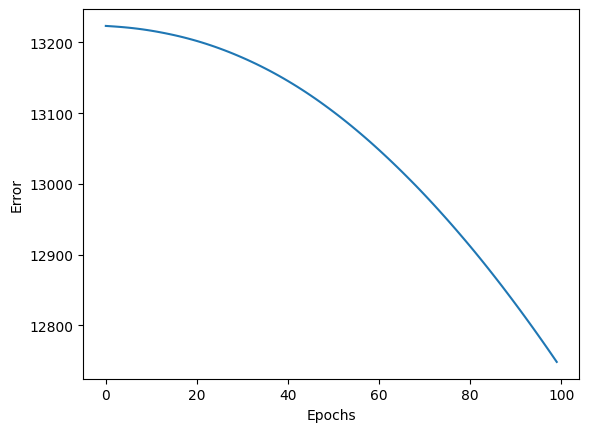

In [26]:
# Call function to plot curve
plt_loss_epoch(history1)

In [27]:
#Function to plot true values vs predictions
def true_vs_pred(y_test, y_pred):
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, c='crimson')
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.axis('equal')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Predictions vs True Values")
    plt.show()

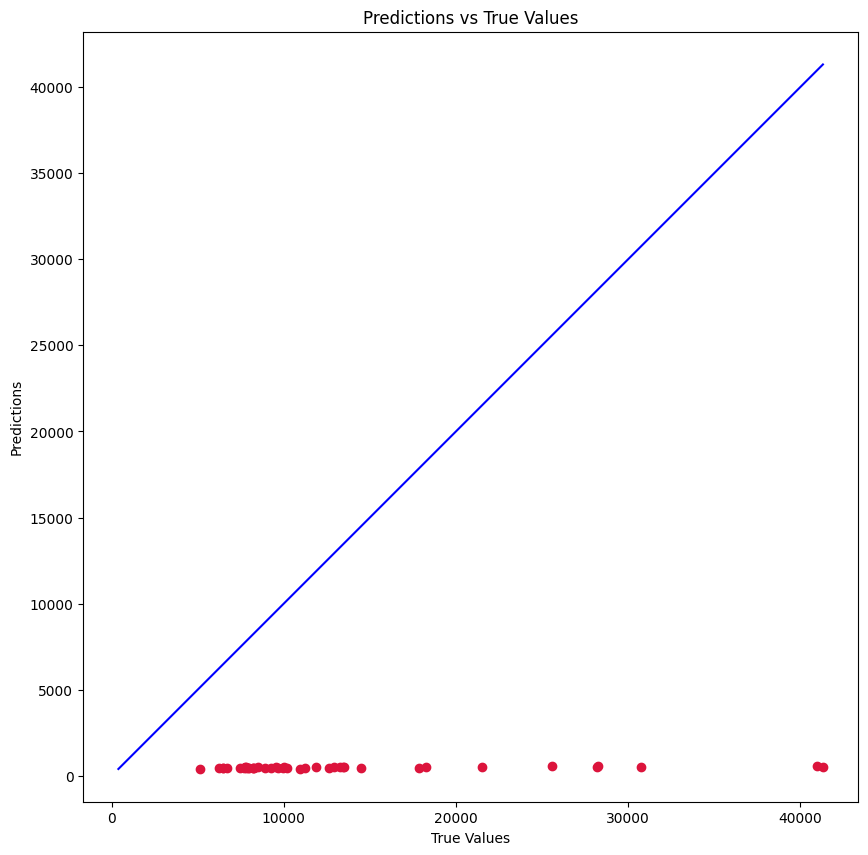

In [28]:
# Call function to plot true vs predicted values
true_vs_pred(y_test, y_pred)

## Build Denser Model

In [29]:
# Create model
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_test_transform.shape[1]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [30]:
# Compile model
model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(0.1),
    metrics=["mae"]
)

In [31]:
# Fit model
history2 = model2.fit(X_train_transform, y_train, epochs=100, verbose=0)

In [32]:
# Evaluate model
model2.evaluate(X_test_transform, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 1920.5292 - mae: 1920.5292


[1920.5291748046875, 1920.5291748046875]

## Make prediction on Dense model

In [33]:
# Make prediction on test data
y_pred = make_pred(model2, X_test_transform, y_test)
y_pred

2/2 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(41,), dtype=float64, numpy=
array([26615.61132812, 18715.37109375,  7993.34423828, 11672.16015625,
       22917.16601562,  5812.26757812,  7444.04589844,  6501.6484375 ,
        8471.97363281,  7563.95605469, 14726.22167969,  6778.70703125,
       14169.18457031,  9331.89257812, 42228.4453125 ,  5363.546875  ,
         716.93811035, 11222.25878906,  8019.36621094,  8522.01171875,
        8505.40332031, 14768.09082031,  4270.88378906,  3792.62353516,
        5635.8359375 , 28153.06054688,  9850.32617188, 13329.95410156,
        5600.10205078, 15365.58691406, 28041.00585938,  5471.06396484,
        6392.67578125, 21782.58984375,  6772.76757812, 27688.00195312,
       11500.01660156, 11491.84082031,  5256.35253906, 11423.01855469,
        6560.11474609])>

In [34]:
# Compare correct and predicted data in a Dataframe
p_df = make_df(tf.cast(y_test, dtype=tf.double), y_pred)
p_df

,Price,Prediction,Difference,Diff %
0,30760.000,26615.611328,4144.388672,13.47
1,17859.167,18715.371094,-856.204094,4.79
2,9549.000,7993.344238,1555.655762,16.29
3,11850.000,11672.160156,177.839844,1.50
4,28248.000,22917.166016,5330.833984,18.87
5,7799.000,5812.267578,1986.732422,25.47
6,7788.000,7444.045898,343.954102,4.42
7,9258.000,6501.648438,2756.351562,29.77
8,10198.000,8471.973633,1726.026367,16.93
9,7775.000,7563.956055,211.043945,2.71


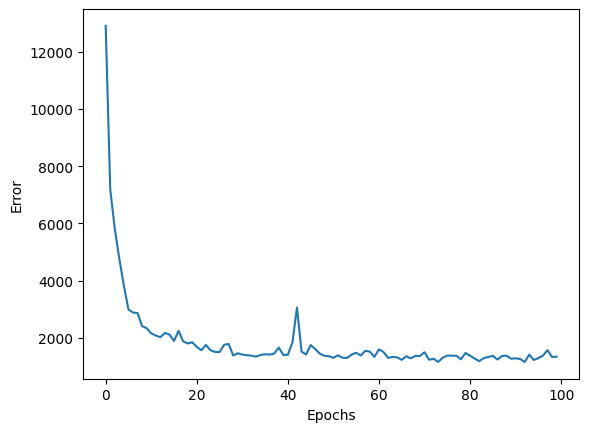

In [35]:
# Plot loss vs epochs curve
plt_loss_epoch(history2)

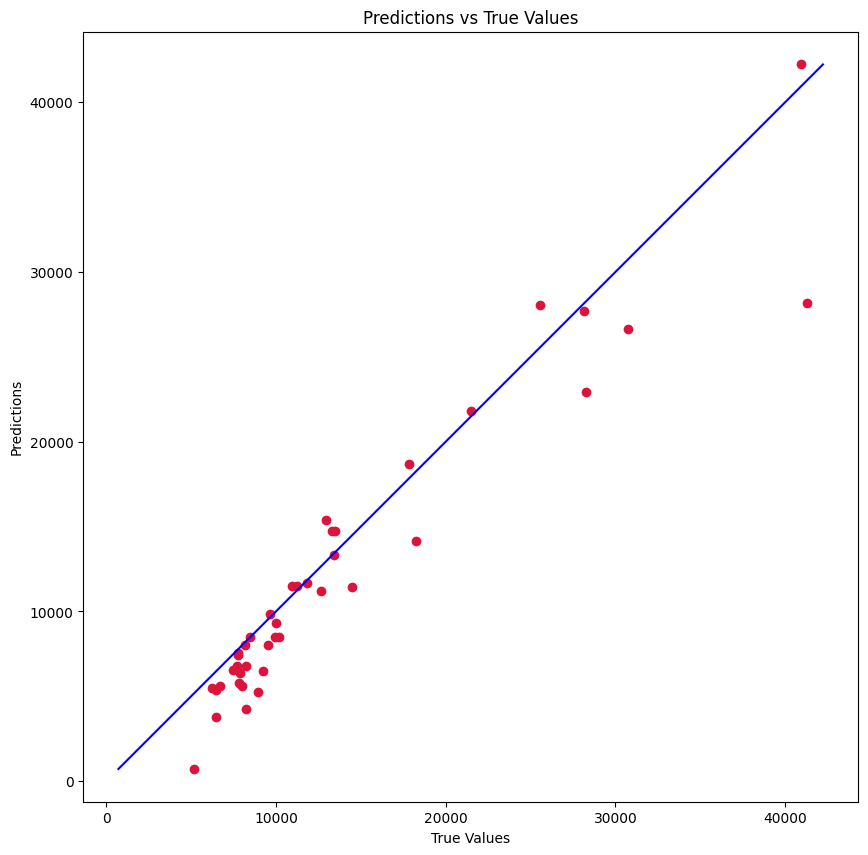

In [36]:
# plot true vs predicted data
true_vs_pred(y_test, y_pred)

## Use Keras tuner to improve model

In [37]:
# Import required libraries
from keras_tuner import RandomSearch
from tensorflow.keras import layers

In [38]:
# Build model and specify hyperparameters 
def build_model(hp):
    model = tf.keras.Sequential()
    for i in range(hp.Int("num_layers",2,20)):
        model.add(layers.Dense(units=hp.Int("units_"+str(i),
                              min_value=32,
                              max_value=512,
                              step=32),
                 activation="relu"))
        model.add(layers.Dense(1,activation="linear"))
        model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Choice("learning_rate",[1e-2,1e-3,1e-4])),
                     loss="mean_absolute_error",
                     metrics=["mean_absolute_error"])
    return model

In [39]:
# Initialise tuner using Randomsearch function
tuner = RandomSearch(build_model,
                    objective="val_mean_absolute_error",
                    max_trials=5,
                    executions_per_trial=3,
                    directory="/kaggle/working/",
                    project_name="tuner_test")

In [40]:
# Summary of tuner we have defined
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [41]:
# Find best model
tuner.search(X_train_transform,
            y_train,
            epochs=100,
            validation_data=(X_test_transform, y_test))

Trial 5 Complete [00h 01m 01s]
val_mean_absolute_error: 2449.8653971354165

Best val_mean_absolute_error So Far: 1881.6827392578125
Total elapsed time: 00h 04m 16s


In [42]:
# Check results of tuner
tuner.results_summary()

Results summary
Results in /kaggle/working/tuner_test
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 0 summary
Hyperparameters:
num_layers: 8
units_0: 352
learning_rate: 0.01
units_1: 384
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 1881.6827392578125

Trial 3 summary
Hyperparameters:
num_layers: 7
units_0: 32
learning_rate: 0.001
units_1: 512
units_2: 384
units_3: 320
units_4: 352
units_5: 352
units_6: 192
units_7: 448
units_8: 416
units_9: 320
units_10: 160
units_11: 480
units_12: 352
units_13: 320
units_14: 96
units_15: 32
units_16: 64
units_17: 192
Score: 2100.256103515625

Trial 4 summary
Hyperparameters:
num_layers: 16
units_0: 352
learning_rate: 0.01
units_1: 288
units_2: 128
units_3: 64
units_4: 256
units_5: 96
units_6: 352
units_7: 192
units_8: 128
units_9: 128
units_10: 448
units_11: 448
units_12: 352
units_13: 224
units_14: 512
units_15: 512
units_16: 256
units_17: 160
Score: 2449.8653971354165

Tria

## Make model based on following Hyperparameters:
* num_layers: 17
* units_0: 480
* units_1: 128
* units_2: 224
* units_3: 192
* units_4: 288
* units_5: 448
* units_6: 512
* units_7: 64
* units_8: 352
* units_9: 480
* units_10: 192
* units_11: 64
* units_12: 32
* units_13: 256
* units_14: 512
* units_15: 128
* units_16: 320
* units_17: 448
* units_18: 416
* learning_rate: 0.001

In [43]:
# Creating model based on best parameters
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_test_transform.shape[1]),
    tf.keras.layers.Dense(480, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),    
    tf.keras.layers.Dense(224, activation="relu"),    
    tf.keras.layers.Dense(192, activation="relu"),
    tf.keras.layers.Dense(288, activation="relu"),
    tf.keras.layers.Dense(448, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(352, activation="relu"),
    tf.keras.layers.Dense(480, activation="relu"),
    tf.keras.layers.Dense(192, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),    
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(320, activation="relu"),
    tf.keras.layers.Dense(448, activation="relu"),
    tf.keras.layers.Dense(416, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [44]:
# Initialising early stopping function
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=50,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True
)

In [45]:
# Compile model
model3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["mae"]
)

In [46]:
# Fit model
history3 = model3.fit(X_train_transform, y_train, epochs=500, validation_split=0.2, callbacks=early_stopping)

Epoch 1/500
5/5 [==============================] - 7s 86ms/step - loss: 12754.8662 - mae: 12754.8662 - val_loss: 15080.8906 - val_mae: 15080.8906
Epoch 2/500
5/5 [==============================] - 0s 16ms/step - loss: 12731.4580 - mae: 12731.4580 - val_loss: 14683.5703 - val_mae: 14683.5703
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 10099.8623 - mae: 10099.8623 - val_loss: 24646.2754 - val_mae: 24646.2754
Epoch 4/500
5/5 [==============================] - 0s 15ms/step - loss: 13080.4482 - mae: 13080.4482 - val_loss: 11615.9082 - val_mae: 11615.9082
Epoch 5/500
5/5 [==============================] - 0s 12ms/step - loss: 10309.4746 - mae: 10309.4746 - val_loss: 13594.7666 - val_mae: 13594.7666
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 11354.3896 - mae: 11354.3896 - val_loss: 13490.5635 - val_mae: 13490.5635
Epoch 7/500
5/5 [==============================] - 0s 12ms/step - loss: 10893.3340 - mae: 10893.3340 - val_loss: 11707.9961 

In [47]:
# Evaluate model
model3.evaluate(X_test_transform, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 1738.8030 - mae: 1738.8030


[1738.802978515625, 1738.802978515625]

## Make prediction on improved model

In [48]:
# Make prediction on test data
y_pred = make_pred(model3, X_test_transform, y_test)
y_pred

2/2 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(41,), dtype=float64, numpy=
array([31050.9765625 , 18643.84960938,  8319.41699219, 13441.01074219,
       24088.49023438,  6188.74072266,  8126.86767578,  7134.52490234,
        8747.3203125 ,  8264.2265625 , 15630.49707031,  7143.15087891,
       16551.15625   , 10184.78417969, 41888.59765625,  6345.55664062,
        3467.00512695, 12891.38183594,  8407.67285156,  9760.48632812,
        8892.15136719, 20643.94335938,  5264.53564453,  4406.10595703,
        6736.14550781, 32520.86914062, 10062.31738281, 15675.82910156,
        6761.31201172, 17798.44921875, 27401.49414062,  6516.79589844,
        7369.26074219, 25635.8515625 ,  7384.23339844, 23651.57226562,
       12616.11035156, 11651.84082031,  6412.42041016, 13139.33300781,
        6813.70947266])>

In [49]:
# Compare correct and predicted data in a Dataframe
p_df = make_df(tf.cast(y_test, dtype=tf.double), y_pred)
p_df

,Price,Prediction,Difference,Diff %
0,30760.000,31050.976562,-290.976562,0.95
1,17859.167,18643.849609,-784.682609,4.39
2,9549.000,8319.416992,1229.583008,12.88
3,11850.000,13441.010742,-1591.010742,13.43
4,28248.000,24088.490234,4159.509766,14.72
5,7799.000,6188.740723,1610.259277,20.65
6,7788.000,8126.867676,-338.867676,4.35
7,9258.000,7134.524902,2123.475098,22.94
8,10198.000,8747.320312,1450.679688,14.23
9,7775.000,8264.226562,-489.226562,6.29


<Axes: >

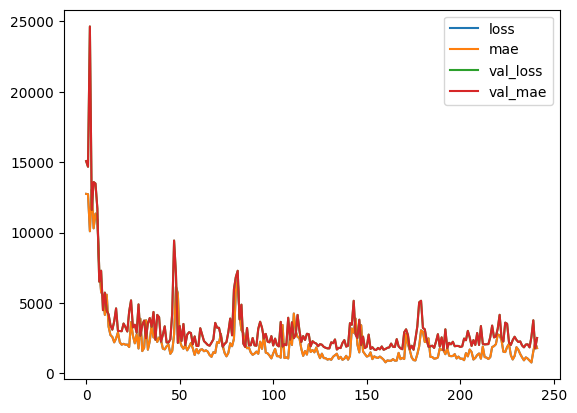

In [50]:
# Plot loss vs epochs curve
pd.DataFrame(history3.history).plot()

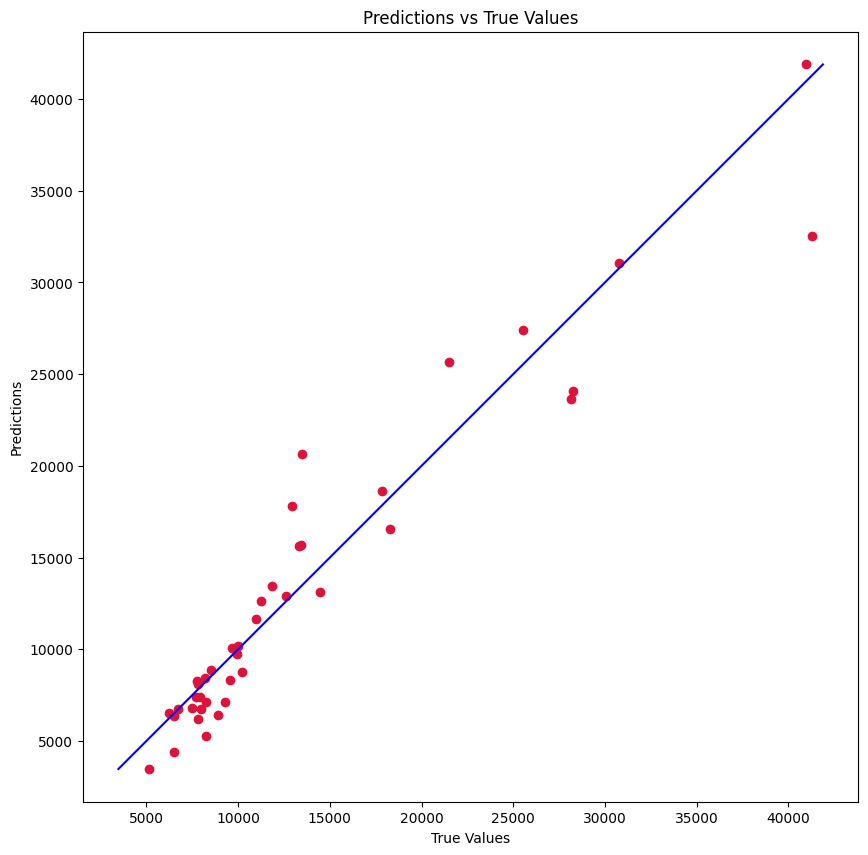

In [51]:
# plot true vs predicted data
true_vs_pred(y_test, y_pred)